# Visualizing time series


# Multiple time series on common axes
For this exercise, you will construct a plot showing four time series stocks on the same axes. The time series in question are represented in the session using the identifiers aapl, ibm, csco, and msft. You'll generate a single plot showing all the time series on common axes with a legend.

1. Plot the aapl time series in blue with a label of 'AAPL'.
2. Plot the ibm time series in green with a label of 'IBM'.
3. Plot the csco time series in red with a label of 'CSCO'.
4. Plot the msft time series in magenta with a label of 'MSFT'.
5. Specify a rotation of 60 for the xticks with plt.xticks().
6. Add a legend in the 'upper left' corner of the plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r'F:\Data Analysis\Springboard\Data Science Career Track\17.Introduction to Data Visualization in Python\Datasets\stocks.csv'

stocks = pd.read_csv(file)
stocks.head()

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.0000,108.0625,116.5625
1,2000-01-04,102.500003,112.0625,102.0000,112.6250
2,2000-01-05,103.999997,116.0000,101.6875,113.8125
3,2000-01-06,94.999998,114.0000,100.0000,110.0000
4,2000-01-07,99.500001,113.5000,105.8750,111.4375


In [3]:
stocks

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.000000,108.062500,116.562500
1,2000-01-04,102.500003,112.062500,102.000000,112.625000
2,2000-01-05,103.999997,116.000000,101.687500,113.812500
3,2000-01-06,94.999998,114.000000,100.000000,110.000000
4,2000-01-07,99.500001,113.500000,105.875000,111.437500
...,...,...,...,...,...
3516,2013-12-24,567.669975,183.220001,21.690001,37.080002
3517,2013-12-26,563.900009,185.350006,21.799999,37.439999
3518,2013-12-27,560.089989,185.080002,22.020000,37.290001
3519,2013-12-30,554.519981,186.410004,22.250000,37.290001


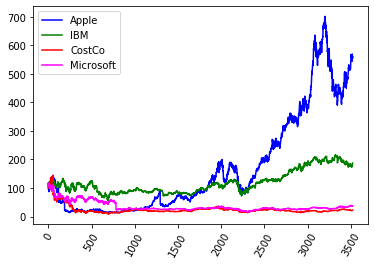

In [4]:
# Plot the aapl time series in blue
plt.plot(stocks['AAPL'], color='blue', label='Apple')

# Plot the ibm time series in green
plt.plot(stocks['IBM'], color='green', label='IBM')

# Plot the csco time series in red
plt.plot(stocks['CSCO'], color='red', label='CostCo')

# Plot the msft time series in magenta
plt.plot(stocks['MSFT'], color='magenta', label='Microsoft')


# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

# Multiple time series slices (1)
You can easily slice subsets corresponding to different time intervals from a time series. In particular, you can use strings like '2001:2005', '2011-03:2011-12', or '2010-04-19:2010-04-30' to extract data from time intervals of length 5 years, 10 months, or 12 days respectively.

Unlike slicing from standard Python lists, tuples, and strings, when slicing time series by labels (and other pandas Series & DataFrames by labels), the slice includes the right-most portion of the slice. That is, extracting my_time_series['1990':'1995'] extracts data from my_time_series corresponding to 1990, 1991, 1992, 1993, 1994, and 1995 inclusive.
You can use partial strings or datetime objects for indexing and slicing from time series.
For this exercise, you will use time series slicing to plot the time series aapl over its full 11-year range and also over a shorter 2-year range. You'll arrange these plots in a 2×1 grid of subplots

1. Plot the series aapl in 'blue' in the top subplot of a vertically-stacked pair of subplots, with the xticks rotated to 45 degrees.
2. Extract a slice named view from the series aapl containing data from the years 2007 to 2008 (inclusive). This has been done for you.
3. Plot the slice view in black in the bottom subplot.

In [5]:
#Date time
stocks['date'] = pd.to_datetime(stocks['Date'], infer_datetime_format=True)
stocks.set_index('date', inplace=True)

In [6]:
del stocks['Date']

In [7]:
stocks

,AAPL,IBM,CSCO,MSFT
date,,,,
2000-01-03,111.937502,116.000000,108.062500,116.562500
2000-01-04,102.500003,112.062500,102.000000,112.625000
2000-01-05,103.999997,116.000000,101.687500,113.812500
2000-01-06,94.999998,114.000000,100.000000,110.000000
2000-01-07,99.500001,113.500000,105.875000,111.437500
...,...,...,...,...
2013-12-24,567.669975,183.220001,21.690001,37.080002
2013-12-26,563.900009,185.350006,21.799999,37.439999
2013-12-27,560.089989,185.080002,22.020000,37.290001


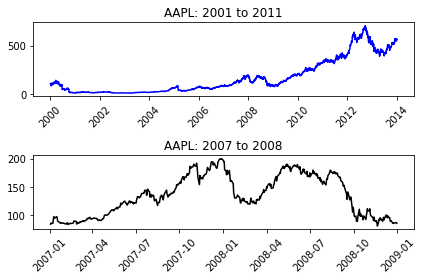

In [8]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(stocks['AAPL'], color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view= stocks['AAPL'].loc['2006-12-31 00:00:00':'2008-12-31 23:00:00']


# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

# Multiple time series slices (2)
In this exercise, you will use the same time series aapl from the previous exercise and plot tighter views of the data.

Partial string indexing works without slicing as well. For instance, using my_time_series['1995'], my_time_series['1999-05'], and my_time_series['2000-11-04'] respectively extracts views of the time series my_time_series corresponding to the entire year 1995, the entire month May 1999, and the entire day November 4, 2000.

1. Extract a slice named view_1 from the series aapl containing data from November 2007 to April 2008 (inclusive). This has been done for you.
2. Plot the slice view_1 in 'red' in the top subplot of a vertically-stacked pair of subplots with the xticks rotated to 45 degrees.
3. Assign the slice view_2 to contain data from the series aapl for January 2008. This has been done for you.
4. Plot the slice view_2 in 'green' in the bottom subplot with the xticks rotated to 45 degrees.

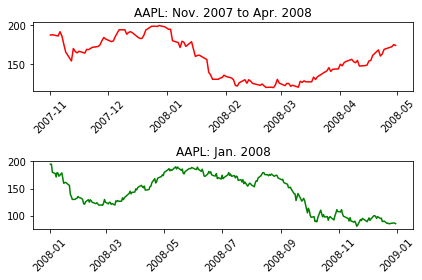

In [9]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view_1= stocks['AAPL'].loc['2007-11-01 00:00:00':'2008-04-30 23:00:00']


# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.plot(view_1, color='red')

# Reassign the series by slicing the month January 2008: view
view_2= stocks['AAPL'].loc['2008-01-01 00:00:00':'2008-12-31 23:00:00']


# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: Jan. 2008')
plt.plot(view_2, color='green')

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

# Plotting an inset view
Remember, rather than comparing plots with subplots or overlayed plots, you can generate an inset view directly using plt.axes(). In this exercise, you'll reproduce two of the time series plots from the preceding two exercises. Your figure will contain an inset plot to highlight the dramatic changes in AAPL stock price between November 2007 and April 2008 (as compared to the 11 years from 2001 to 2011).

1. Extract a slice of series aapl from November 2007 to April 2008 inclusive. This has been done for you.
2. Plot the entire series aapl.
3. Create a set of axes with lower left corner (0.25, 0.5), width 0.35, and height 0.35. Pass these four coordinates to plt.axes() as a list (all in units relative to the figure dimensions).
4. Plot the sliced view in the current axes in 'red'.

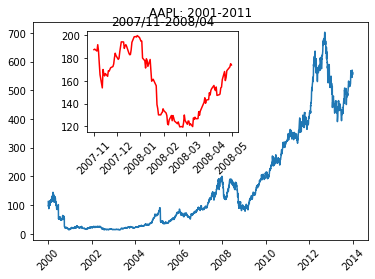

In [10]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view= stocks['AAPL'].loc['2007-11-01 00:00:00':'2008-04-30 23:00:00']


# Plot the entire series 
plt.plot(stocks['AAPL'])
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25, 0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

# Time series with moving windows


# Plotting moving standard deviations
Having plotted pre-computed moving averages of AAPL stock prices on distinct subplots in the previous exercise, you will now plot pre-computed moving standard deviations of the same stock prices, this time together on common axes.

The time series aapl is not plotted in this case; it is of a different length scale than the standard deviations.
The time series std_30, std_75, stdn_125, & std_250 have been computed for you (containing the windowed standard deviations of the series aapl computed over windows of width 30 days, 75 days, 125 days, & 250 days respectively).

1. Produce a single plot with four curves overlayed:
2. the series std_30 in 'red' (with corresponding label '30d').
3. the series std_75 in 'cyan' (with corresponding label '75d').
4. the series std_125 in 'green' (with corresponding label '125d').
5. the series std_250 in 'magenta' (with corresponding label '250d').
6. Add a legend to the 'upper left' corner of the plot.

In [11]:
# Plot std_30 in red
plt.plot(std_30, 'red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, 'cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, 'green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250, 'magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

NameError: name 'std_30' is not defined

# Histogram equalization in images

# Extracting a histogram from a grayscale image
For grayscale images, various image processing algorithms use an image histogram. Recall that an image is a two-dimensional array of numerical intensities. An image histogram, then, is computed by counting the occurences of distinct pixel intensities over all the pixels in the image.

For this exercise, you will load an unequalized low contrast image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). You will plot the image and use the pixel intensity values to plot a normalized histogram of pixel intensities.


1. Load data from the file '640px-Unequalized_Hawkes_Bay_NZ.jpg' into an array.
2. Display image with a color map of 'gray' in the top subplot.
3. Flatten image into a 1-D array using the .flatten() method.
4. Display a histogram of pixels in the bottom subplot.
5. Use histogram options bins=64, range=(0,256), and normed=True to control numerical binning and the vertical scale.
6. Use plotting options color='red' and alpha=0.4 to tailor the color and transparency.

In [ ]:
# Load the image into an array: image
image =  plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256), normed=True, color='red', alpha=0.4 )

# Display the plot
plt.show()


# Cumulative Distribution Function from an image histogram
A histogram of a continuous random variable is sometimes called a Probability Distribution Function (or PDF). The area under a PDF (a definite integral) is called a Cumulative Distribution Function (or CDF). The CDF quantifies the probability of observing certain pixel intensities.

Your task here is to plot the PDF and CDF of pixel intensities from a grayscale image. You will use the grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). This time, the 2D array image will be pre-loaded and pre-flattened into the 1D array pixels for you.

The histogram option cumulative=True permits viewing the CDF instead of the PDF.
Notice that plt.grid('off') switches off distracting grid lines.
The command plt.twinx() allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.

1. First, use plt.hist() to plot the histogram of the 1-D array pixels in the bottom subplot.
2. Use the histogram options bins=64, range=(0,256), and normed=False.
3. Use the plotting options alpha=0.4 and color='red' to make the overlayed plots easier to see.
4. Second, use plt.twinx() to overlay plots with different vertical scales on a common horizontal axis.
5. Third, call plt.hist() again to overlay the CDF in the bottom subplot.
6. Use the histogram options bins=64, range=(0,256), and normed=True.
7. This time, also use cumulative=True to compute and display the CDF.
8. Also, use alpha=0.4 and color='blue' to make the overlayed plots easier to see.

In [ ]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()

# Equalizing an image histogram
Histogram equalization is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. This is particularly useful in astronomy and medical imaging to help us see more features.

For this exercise, you will again work with the grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). Notice the sample code produces the same plot as the previous exercise. Your task is to modify the code from the previous exercise to plot the new equalized image as well as its PDF and CDF.

The arrays image and pixels are extracted for you in advance.
The CDF of the original image is computed using plt.hist().
Notice an array new_pixels is created for you that interpolates new pixel values using the original image CDF.

1. Plot the new equalized image.
2. Use the NumPy array method .reshape() to create a 2-D array new_image from the 1-D array new_pixels.
3. The resulting new_image should have the same shape as image.shape, which can be accomplished by passing this as the argument to .reshape().
4. Display new_image with a 'gray' color map to display the sharper, equalized image.

In [ ]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')
plt.show()

1. Plot the new equalized image's PDF and CDF.
2. Plot the PDF of new_pixels in 'red'.
3. Use plt.twinx() to overlay plots with different vertical scales on a common horizontal axis.
4. Plot the CDF of new_pixels in 'blue'.

In [ ]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()

# Extracting histograms from a color image
This exercise resembles the last in that you will plot histograms from an image. This time, you will use a color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as two-dimensional arrays red, green, and blue respectively. You will plot three overlaid color histograms on common axes (one for each channel) in a subplot as well as the original image in a separate subplot.

1. Display image in the top subplot of a 2×1 subplot grid. Don't use a colormap here.
2. Flatten the 2-D arrays red, green, and blue into 1-D arrays.
3. Display three histograms in the bottom subplot: one for red_pixels, one for green_pixels, and one for blue_pixels. For each, use 64 bins and specify a translucency of alpha=0.2.

In [ ]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, green, blue
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)

# Display the plot
plt.show()

# Extracting bivariate histograms from a color image
Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

For this final exercise, you will use the same color image of the Helix Nebula as seen by the Hubble and the Cerro Tololo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as one-dimensional arrays red_pixels, green_pixels, & blue_pixels respectively.

1. Make a 2-D histogram (not a regular histogram) in the top left subplot showing the joint variation of red_pixels (on the x-axis) and green_pixels (on the y-axis). Use bins=(32,32) to control binning.
2. Make another 2-D histogram in the top right subplot showing the joint variation of green_pixels (on the x-axis) and blue_pixels (on the y-axis). Use bins=(32,32) to control binning.
3. Make another 2-D histogram in the bottom left subplot showing the joint variation of blue_pixels (on the x-axis) and red_pixels (on the y-axis). Use bins=(32,32) to control binning.

In [ ]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32, 32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32, 32))

# Display the plot
plt.show()
